In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wine = load_wine()
print(type(wine))

<class 'sklearn.utils.Bunch'>


In [3]:
dataset = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])
dataset.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [4]:
dataset.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [5]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
target                          178 non-null float64
dtypes: float64(14)
memory usage: 19.5 KB
None


In [6]:
print(dataset["target"].value_counts())

1.0    71
0.0    59
2.0    48
Name: target, dtype: int64


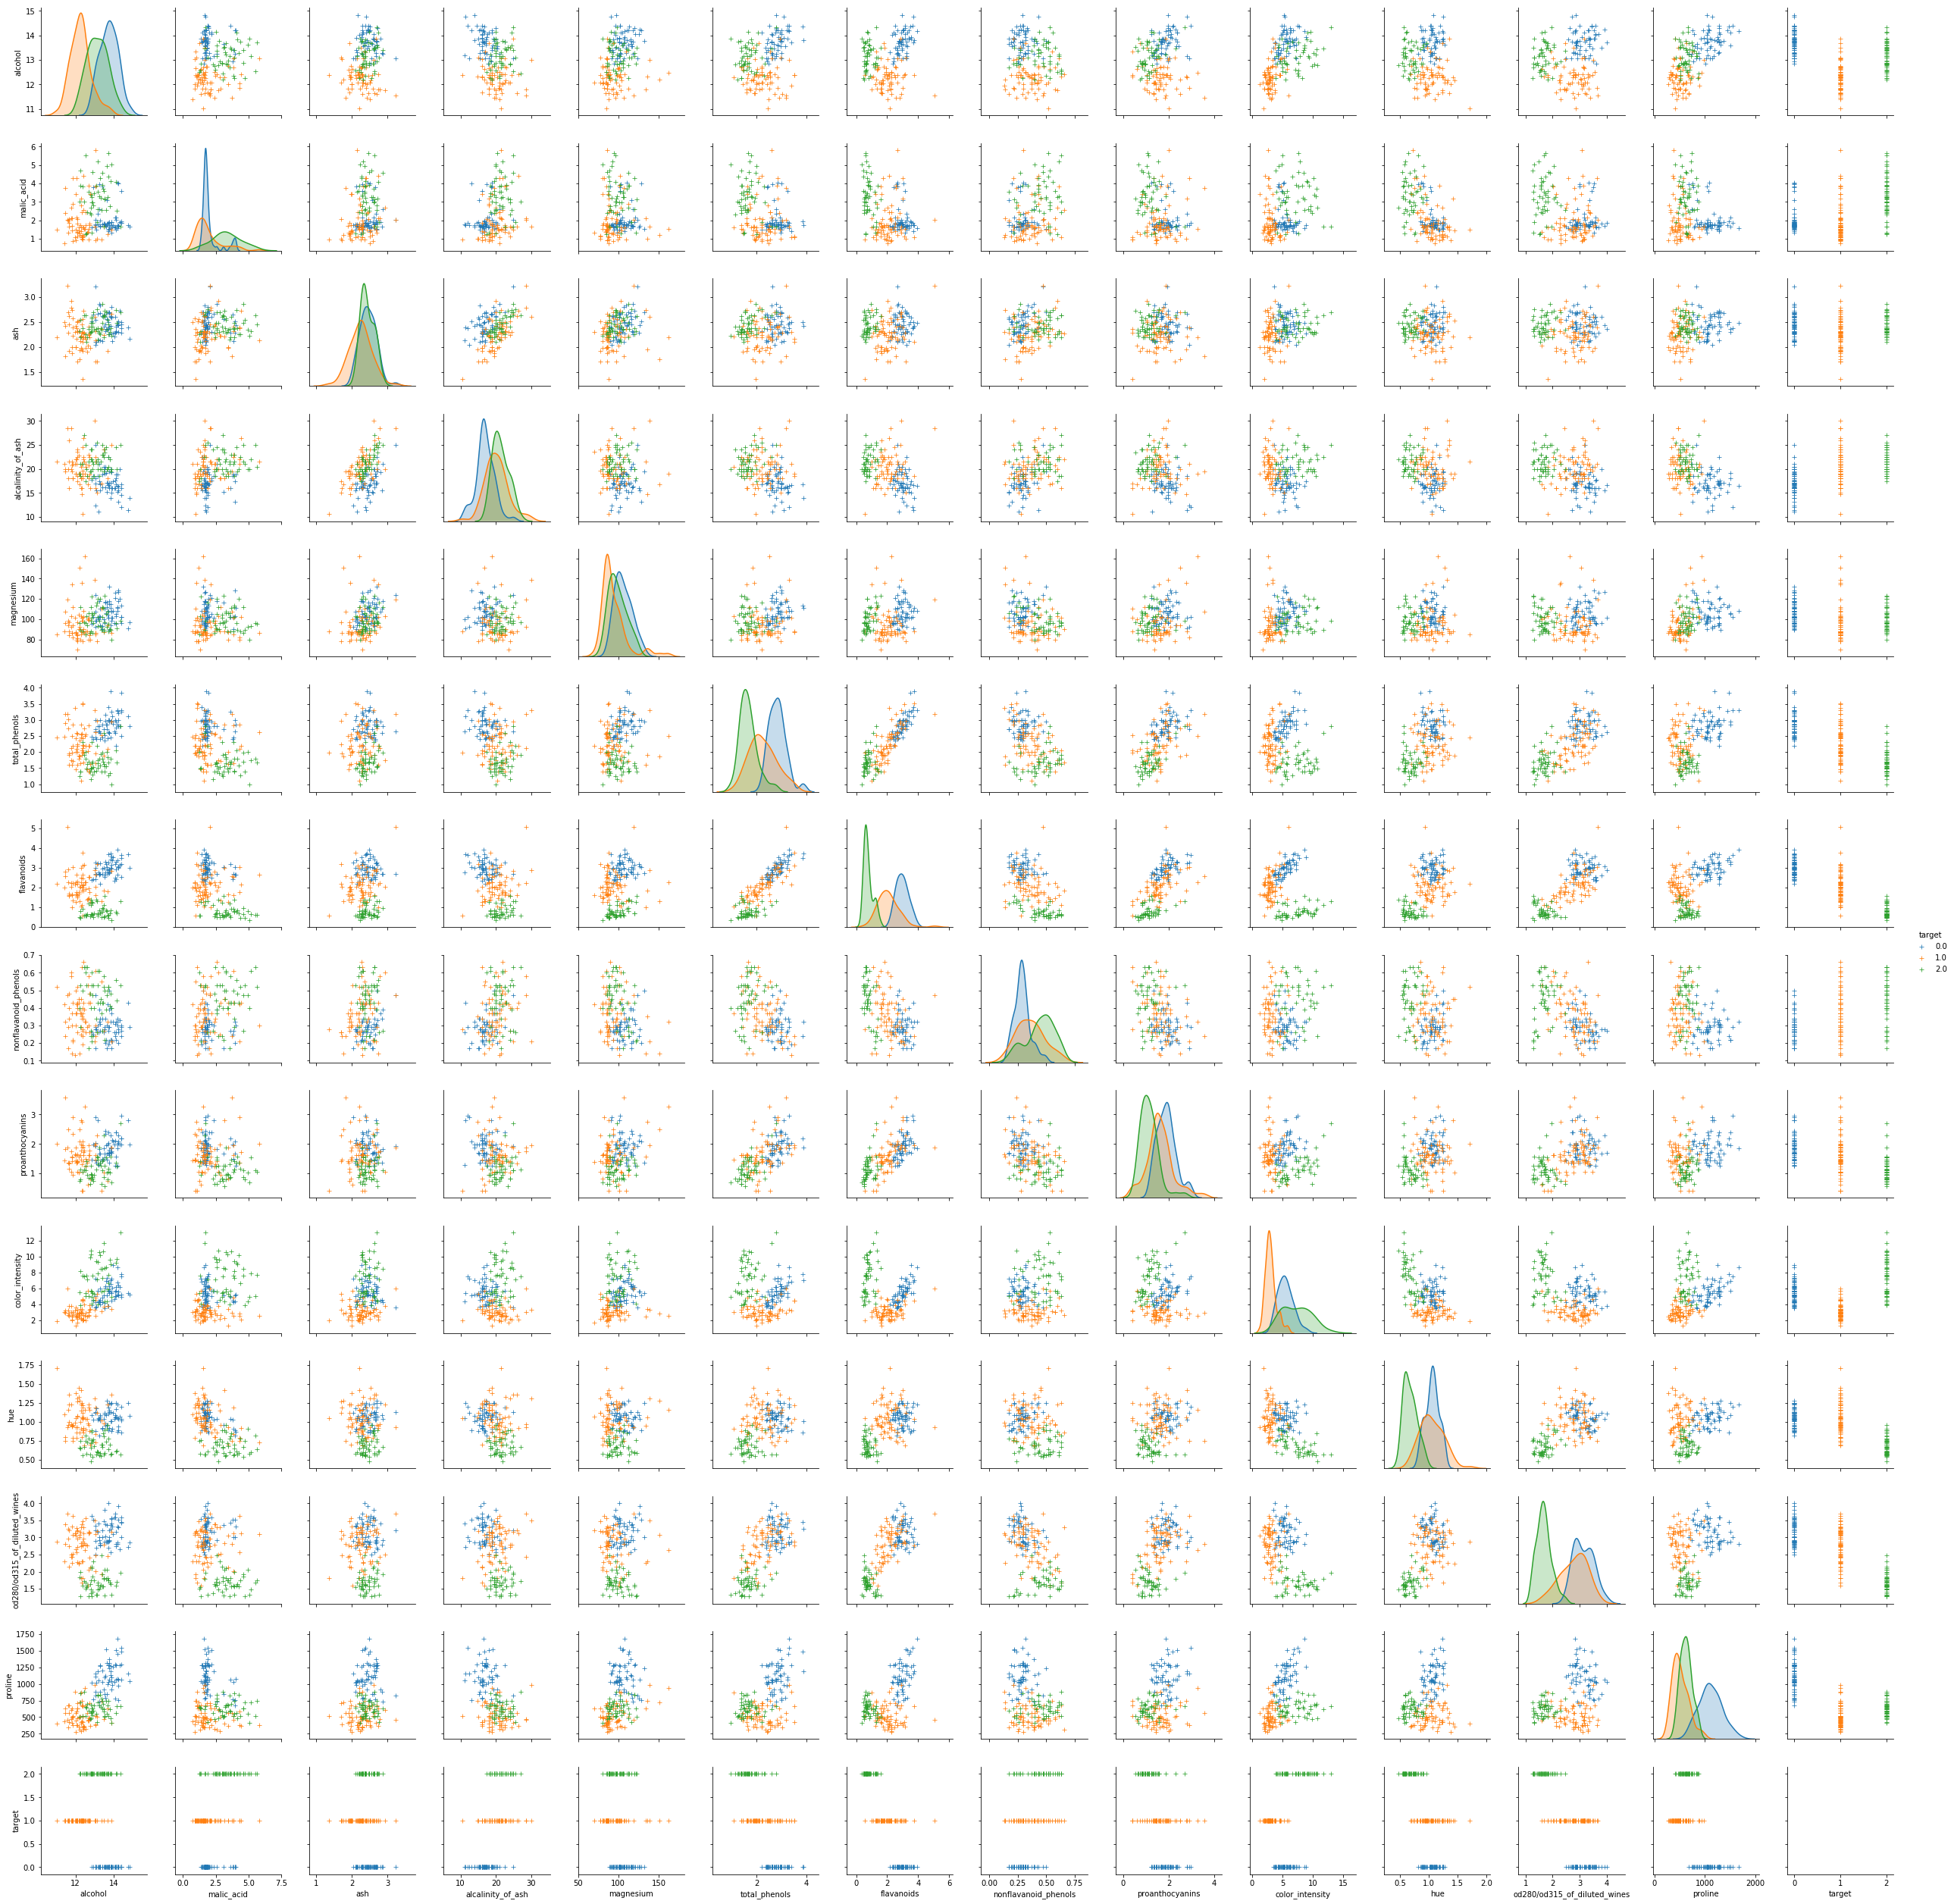

In [15]:
graph = sns.pairplot(dataset, hue = "target" , markers='+')
plt.show();

In [8]:
print(dataset.columns)

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')


In [9]:
# load dataset
data = dataset.copy()
def split_data(data, train_test_split = 2/3):
    dataset_shuffle=data.iloc[np.random.permutation(len(data))]
    dataset=dataset_shuffle.reset_index(drop=True)
    X, Y = data[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']].values, data[["target"]].values
    num_train = int(len(X)*train_test_split)
    X_train, Y_train = X[:num_train], Y[:num_train]
    X_test, Y_test = X[num_train:], Y[num_train:]
    return X_train, Y_train, X_test, Y_test

# split the dataset in train and test
train_test_split = 0.8   
X_train, Y_train, X_test, Y_test = split_data(data, train_test_split = train_test_split)

print("X_train shape:{}\nY_train shape:{}\nX_test shape:{}\nY_test shape:{}".format(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape))

X_train shape:(142, 13)
Y_train shape:(142, 1)
X_test shape:(36, 13)
Y_test shape:(36, 1)


In [10]:
model = DecisionTreeClassifier()
model = model.fit(X_train, Y_train)

In [11]:
Y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print("features importance:", model.feature_importances_)
Y_pred = model.predict(X_test)
print("=== Confusion Matrix ===")
print(confusion_matrix(Y_test, Y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(Y_test, Y_pred))

features importance: [0.04790293 0.         0.         0.         0.         0.02427409
 0.14719404 0.         0.         0.14785942 0.         0.02361632
 0.6091532 ]
=== Confusion Matrix ===
[[ 0  0  0]
 [ 0  0  0]
 [ 1  2 33]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.92      0.96        36

   micro avg       0.92      0.92      0.92        36
   macro avg       0.33      0.31      0.32        36
weighted avg       1.00      0.92      0.96        36



C:\Users\Kuldeep Jaimini\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Kuldeep Jaimini\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Kuldeep Jaimini\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [13]:
# calculate Accuracy
accuracy = np.zeros((len(Y_test),1))
for i in range(len(Y_pred)):
    if Y_pred[i] == Y_test[i]:
        accuracy[i] = 1
Accuracy = (np.sum(accuracy)/len(accuracy)*100)  
print("Accuracy:" ,Accuracy)

Accuracy: 91.66666666666666


## Save model_1

In [22]:
import pickle
filename = 'final_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [23]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.9166666666666666


## Save model_2

In [20]:
from sklearn.externals import joblib  
# Save the model as a pickle in a file 
joblib.dump(model, 'model.pkl') 

['model.pkl']

In [21]:
# Load the model from the file 
decision_tree_from_joblib = joblib.load('model.pkl')   
# Use the loaded model to make predictions 
decision_tree_from_joblib.predict(X_test) 

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 0., 1.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2.])